In [273]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math
import scipy.stats as sc
import itertools
from matplotlib.patches import Rectangle

In [3]:
class Network:
    
    def __init__(self,q_N,q_P,alpha,landa):
        self.q_N,self.q_P,self.alpha,self.landa=q_N,q_P,alpha,landa
            
    def Inform_Neighbor(self,i,j,state):
        rand=int(np.random.uniform(0,4))
        if state==1:
            rand_qp= np.random.uniform(0,1)
            if rand_qp<self.q_P:
                inform=1
            else:
                inform=0   
            Ind=0
            while Ind<4:
                if Ind!=rand:
                    edge[i][j][Ind]=1*inform
                else:
                    edge[i][j][Ind]=0*inform
                Ind+=1
        elif state==-1:
            rand_qn= np.random.uniform(0,1)
            if rand_qn<self.q_N:
                inform=1
            else:
                inform=0      
            Ind=0
            while Ind<4:
                if Ind!=rand:
                    edge[i][j][Ind]=0*inform
                else:
                    edge[i][j][Ind]=1*inform
                Ind+=1
        return edge[i][j][0],edge[i][j][1],edge[i][j][2],edge[i][j][3]
    
    def Full_Edge(self):
        i,j=0,0
        while i<dim:
            j=0
            while j<dim:
                self.Inform_Neighbor(i,j,state[i][j])
                j+=1
            i+=1
                
    def Single_State_Update(self,i,j,single_state):
        if single_state==0:
            if i>0 and j>0 and i<(dim-1) and j<(dim-1):
                if edge[i-1][j][1]+edge[i+1][j][3]+edge[i][j-1][2]+edge[i][j+1][0]>0:
                    F=(edge[i-1][j][1]*state[i-1][j]*(state[i-1][j]+1)+edge[i+1][j][3]*state[i+1][j]*(state[i+1][j]+1)+edge[i][j-1][2]*state[i][j-1]*(state[i][j-1]+1)+edge[i][j+1][0]*state[i][j+1]*(state[i][j+1]+1))/(2*(edge[i-1][j][1]+edge[i+1][j][3]+edge[i][j-1][2]+edge[i][j+1][0]))
                    P_acceptance=self.alpha+self.landa*F
                    thereshold=P_acceptance*(edge[i-1][j][1]+edge[i+1][j][3]+edge[i][j-1][2]+edge[i][j+1][0])
                    rand=np.random.uniform(0,1)
                    if rand<thereshold:
                        single_state=1
                    else:
                        single_state=-1
        return single_state
    
    def Full_State_Update(self):
        i,j=0,0
        while i<dim:
            j=0
            while j<dim:
                state[i][j]=self.Single_State_Update(i,j,state[i][j])
                j+=1
            i+=1

In [290]:
def Moments(q_N,q_P,alpha,landa,Time):
    agent=Network(q_N,q_P,alpha,landa)
    t=0
    while t<Time:
        agent.Full_Edge()
        agent.Full_State_Update()
        t+=1
    return np.count_nonzero(state==1)/(dim*dim), np.count_nonzero(state==-1)/(dim*dim), np.count_nonzero(state==0)/(dim*dim)

In [325]:
def Moments_plot(q_N,q_P,alpha,landa,Time):
    agent=Network(q_N,q_P,alpha,landa)
    t=0
    while t<Time:
        agent.Full_Edge()
        agent.Full_State_Update()
        t+=1
    df=pd.DataFrame(state).astype(int)
    display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

In [341]:
global edge
global state
global dim
edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
state=np.zeros(dim*dim).reshape(dim,dim)
state[6][6]=1
dim=13

In [342]:
# Period 1
dim=13
agent=Network(0.6,0.3,0.2,0.2)
t=0
while t<1:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [343]:
# Period 5
t=0
while t<4:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,-1,0,0,0,0,0,0
6,0,0,0,0,-1,1,1,0,0,0,0,0,0
7,0,0,0,0,0,-1,-1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [344]:
# Period 10
t=0
while t<5:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,-1,1,0,0,0,0,0
5,0,0,0,0,-1,-1,-1,0,0,0,0,0,0
6,0,0,0,0,-1,1,1,-1,0,0,0,0,0
7,0,0,0,-1,-1,-1,-1,-1,0,0,0,0,0
8,0,0,0,0,0,0,-1,-1,0,0,0,0,0
9,0,0,0,0,0,0,0,-1,0,0,0,0,0


In [345]:
# Period 15
t=0
while t<5:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,-1,0,0,0,0,0
4,0,0,0,0,0,0,-1,1,-1,0,0,0,0
5,0,-1,-1,0,-1,-1,-1,-1,1,1,0,0,0
6,0,0,-1,-1,-1,1,1,-1,-1,0,0,0,0
7,0,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0
8,0,0,-1,0,0,-1,-1,-1,-1,0,0,0,0
9,0,0,0,0,-1,-1,1,-1,-1,0,0,0,0


In [346]:
# Period 20
t=0
while t<5:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,-1,0,0,-1,-1,1,-1,-1,0,0
4,0,1,1,-1,0,-1,-1,1,-1,-1,-1,0,0
5,0,-1,-1,-1,-1,-1,-1,-1,1,1,-1,0,0
6,0,-1,-1,-1,-1,1,1,-1,-1,-1,-1,0,0
7,0,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0
8,0,1,-1,1,1,-1,-1,-1,-1,1,0,0,0
9,0,-1,-1,0,-1,-1,1,-1,-1,1,0,0,0


In [347]:
# Period 25
t=0
while t<5:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,-1,-1,0,0
2,0,0,0,0,0,0,1,1,1,-1,-1,0,0
3,0,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,0
4,0,1,1,-1,1,-1,-1,1,-1,-1,-1,0,0
5,0,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,0
6,0,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,0
7,0,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,0
8,0,1,-1,1,1,-1,-1,-1,-1,1,1,-1,0
9,0,-1,-1,1,-1,-1,1,-1,-1,1,1,1,0


In [348]:
# Period 30
t=0
while t<5:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,-1,-1,1,1,1,-1,-1,-1,0
2,0,0,0,-1,-1,-1,1,1,1,-1,-1,-1,0
3,0,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,0
4,0,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,0
5,0,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,0
6,0,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,0
7,0,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,0
8,0,1,-1,1,1,-1,-1,-1,-1,1,1,-1,0
9,0,-1,-1,1,-1,-1,1,-1,-1,1,1,1,0


In [349]:
# Period 35
t=0
while t<5:
    agent.Full_Edge()
    agent.Full_State_Update()
    t+=1
df=pd.DataFrame(state).astype(int)
display(df.style.apply(lambda x: ["color:darkolivegreen;background:darkseagreen" if v > 0 else "color:white" for v in x], axis = 1).apply(lambda x: ["color:mistyrose;background:rosybrown" if v < 0 else "" for v in x], axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,0
2,0,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,0
3,0,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,0
4,0,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,0
5,0,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,0
6,0,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,0
7,0,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,0
8,0,1,-1,1,1,-1,-1,-1,-1,1,1,-1,0
9,0,-1,-1,1,-1,-1,1,-1,-1,1,1,1,0


In [239]:
#Bootstrap
Bootstrap_size=100
dim=100
edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
state=np.zeros(dim*dim).reshape(dim,dim)
Moment_acceptance_Opt=np.zeros(Bootstrap_size)
Moment_rejection_Opt=np.zeros(Bootstrap_size)
Moment_none_Opt=np.zeros(Bootstrap_size)
i=0
while i<Bootstrap_size:
    edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
    state=np.zeros(dim*dim).reshape(dim,dim)
    #for k in range(5):
        #Ind1=int(np.random.uniform(0,dim))
        #Ind2=int(np.random.uniform(0,dim))
    state[25][25]=1
    state[75][75]=1
    state[25][75]=1
    state[75][25]=1
    state[50][50]=1
    reults=Moments(0.6,0.3,0.2,0.2,50)
    Moment_acceptance_Opt[i]=reults[0]
    Moment_rejection_Opt[i]=reults[1]
    Moment_none_Opt[i]=reults[2]
    i+=1

In [243]:
#Bootstrap
Bootstrap_size=100
edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
state=np.zeros(dim*dim).reshape(dim,dim)
Moment_acceptance_random=np.zeros(Bootstrap_size)
Moment_rejection_random=np.zeros(Bootstrap_size)
Moment_none_random=np.zeros(Bootstrap_size)
i=0
dim=100
while i<Bootstrap_size:
    edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
    state=np.zeros(dim*dim).reshape(dim,dim)
    for k in range(5):
        Ind1=int(np.random.uniform(0,dim))
        Ind2=int(np.random.uniform(0,dim))
        state[Ind1][Ind2]=1
    reults=Moments(0.6,0.3,0.2,0.2,50)
    Moment_acceptance_random[i]=reults[0]
    Moment_rejection_random[i]=reults[1]
    Moment_none_random[i]=reults[2]
    i+=1

In [376]:
#Bootstrap
Bootstrap_size=100
edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
state=np.zeros(dim*dim).reshape(dim,dim)
Moment_acceptance_randomn=np.zeros(Bootstrap_size)
Moment_rejection_randomn=np.zeros(Bootstrap_size)
Moment_none_randomn=np.zeros(Bootstrap_size)
i=0
dim=100
while i<Bootstrap_size:
    edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
    state=np.zeros(dim*dim).reshape(dim,dim)
    for k in range(7):
        Ind1=int(np.random.uniform(0,dim))
        Ind2=int(np.random.uniform(0,dim))
        state[Ind1][Ind2]=1
    reults=Moments(0.6,0.3,0.2,0.2,50)
    Moment_acceptance_randomn[i]=reults[0]
    Moment_rejection_randomn[i]=reults[1]
    Moment_none_randomn[i]=reults[2]
    i+=1

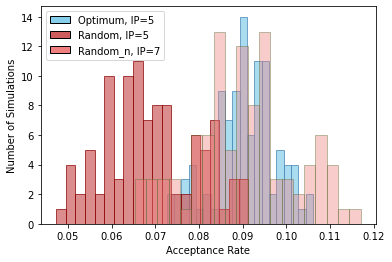

In [377]:
plt.hist(Moment_acceptance_Opt,bins=20,edgecolor="steelblue",color="skyblue",alpha=0.7)
plt.hist(Moment_acceptance_random,bins=20,edgecolor="darkred",color="indianred",alpha=0.7)
plt.hist(Moment_acceptance_randomn,bins=20,edgecolor="darkolivegreen",color="lightcoral",alpha=0.4)
plt.xlabel("Acceptance Rate")
plt.ylabel("Number of Simulations")
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["skyblue","indianred", "lightcoral"]]
labels= ["Optimum, IP=5","Random, IP=5", "Random_n, IP=7"]
plt.legend(handles, labels)

In [378]:
#t_test
sc.ttest_ind(Moment_acceptance_opt, Moment_acceptance_random, equal_var=True)

Ttest_indResult(statistic=7.597627236937018, pvalue=6.439574566164863e-14)

In [379]:
sc.ttest_ind(Moment_acceptance_opt, Moment_acceptance_randomn, equal_var=True)

Ttest_indResult(statistic=0.7579659678770104, pvalue=0.4486340011569677)

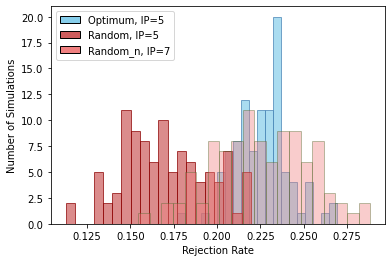

In [386]:
plt.hist(Moment_rejection_Opt,bins=20,edgecolor="steelblue",color="skyblue",alpha=0.7)
plt.hist(Moment_rejection_random,bins=20,edgecolor="darkred",color="indianred",alpha=0.7)
plt.hist(Moment_rejection_randomn,bins=20,edgecolor="darkolivegreen",color="lightcoral",alpha=0.4)
plt.xlabel("Rejection Rate")
plt.ylabel("Number of Simulations")
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["skyblue","indianred", "lightcoral"]]
labels= ["Optimum, IP=5","Random, IP=5", "Random_n, IP=7"]
plt.legend(handles, labels)

In [387]:
#t_test
sc.ttest_ind(Moment_rejection_opt, Moment_rejection_random, equal_var=True)

Ttest_indResult(statistic=-11.166155130197179, pvalue=1.695302762186566e-27)

In [388]:
#t_test
sc.ttest_ind(Moment_rejection_opt, Moment_rejection_randomn, equal_var=True)

Ttest_indResult(statistic=-25.648954695294027, pvalue=4.556088719563472e-114)

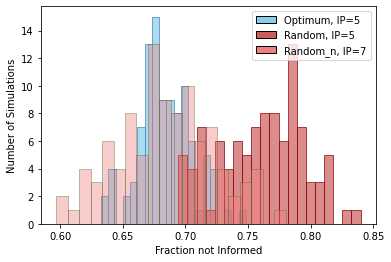

In [389]:
plt.hist(Moment_none_Opt,bins=20,edgecolor="steelblue",color="skyblue",alpha=0.7)
plt.hist(Moment_none_random,bins=20,edgecolor="darkred",color="indianred",alpha=0.7)
plt.hist(Moment_none_randomn,bins=20,edgecolor="darkolivegreen",color="lightcoral",alpha=0.4)
plt.xlabel("Fraction not Informed")
plt.ylabel("Number of Simulations")
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["skyblue","indianred", "lightcoral"]]
labels= ["Optimum, IP=5","Random, IP=5", "Random_n, IP=7"]
plt.legend(handles, labels)

In [390]:
#t_test
sc.ttest_ind(Moment_none_opt, Moment_none_random, equal_var=True)

Ttest_indResult(statistic=3.1420517772336933, pvalue=0.001722587879777772)

In [391]:
sc.ttest_ind(Moment_none_opt, Moment_none_randomn, equal_var=True)

Ttest_indResult(statistic=16.361206418038552, pvalue=5.2038295759809334e-54)

In [60]:
def Moments_Optimization(arguments):
    q_N=arguments[0]
    q_P=arguments[1]
    alpha=arguments[2]
    landa=arguments[3]
    Time=20
    Moment_acceptance=np.zeros(10)
    Moment_rejection=np.zeros(10)
    Moment_none=np.zeros(10)
    i=0
    while i<10:
        edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
        state=np.zeros(dim*dim).reshape(dim,dim)
        state[6][6]=1
        Moment_acceptance[i]=Moments(q_N,q_P,alpha,landa,Time)[0]
        Moment_rejection[i]=Moments(q_N,q_P,alpha,landa,Time)[1]
        Moment_none[i]=Moments(q_N,q_P,alpha,landa,Time)[2]
        i+=1
    return ((np.mean(Moment_acceptance)-0.05)**2+(np.mean(Moment_rejection)-0.1)**2+(np.var(Moment_acceptance)-0.02)**2+(np.var(Moment_rejection)-0.04)**2)

In [65]:
Opt_Results=minimize(Moments_Optimization,[0.2,0.2,0.2,0.2],options={'maxiter': 300})

In [69]:
Time=20
Moment_acceptance=np.zeros(10)
Moment_rejection=np.zeros(10)
Moment_none=np.zeros(10)
i=0
q_N=0.01
q_P=0.01
alpha=0.01
landa=0.1
error=100
while q_N<0.5:
    q_P=0
    while q_P<0.5:
        alpha=0
        while alpha<1.5:
            landa=0
            while landa<1.5:
                i=0
                while i<10:
                    edge=np.zeros(4*dim*dim).reshape(dim,dim,4)
                    state=np.zeros(dim*dim).reshape(dim,dim)
                    state[6][6]=1
                    result=Moments(q_N,q_P,alpha,landa,Time)
                    Moment_acceptance[i]=result[0]
                    Moment_rejection[i]=result[1]
                    Moment_none[i]=result[2]
                    i+=1
                res=(np.mean(Moment_acceptance)-0.4)**2+(np.mean(Moment_rejection)-0.2)**2+(np.var(Moment_acceptance)-0.1)**2+(np.var(Moment_rejection)-0.05)**2
                #res=max((np.mean(Moment_acceptance)-0.4)**2,(np.mean(Moment_rejection)-0.2)**2,(np.var(Moment_acceptance)-0.1)**2,(np.var(Moment_rejection)-0.05)**2)
                if res<error:
                    error=res
                    q_N_opt=q_N
                    q_P_opt=q_P
                    alpha_opt=alpha
                    landa_opt=landa
                    print(error)
                landa=landa+0.1
            alpha=alpha+0.1
        q_P=q_P+0.05
    q_N=q_N+0.05

0.20780128496901373
0.20252729879668224
0.20162423994339185
0.1975239984932479
0.1969247167573575
0.19371022852920114
0.1777090410153868
0.17069164513922974
0.17053012082770388
0.1703806476782183
0.1659683157111353
0.16165416952783856
0.15652704113150595
0.1328988462296739
0.12557856162511746
0.12127944892993678
0.11499179677517628
0.10570459273974067
0.10266299279673693
0.09947582032735532
0.07067775706108292
0.06587373064818043
0.06163172969502519
0.059581948215727445
0.05014214053978237
0.04909468398714385
0.0481092255125451
0.047912159106362755
0.03987557350705688
0.03390133471962251
0.03113133397559022
0.025542238115854904
0.024575280136593023
0.02291637156583196
0.02212794588142035
0.020965459090145015
0.019763686298753483
0.019235795403615797
0.015795404325835122
0.014739094182772602
0.014598308903459823
0.012357276931096487
0.011642755945929367
0.011343188873476302
0.011303668666415226
0.010904209811781751
0.010366652766041899
0.009806521287801297


In [70]:
q_N_opt,q_P_opt,alpha_opt,landa_opt,error

(0.36, 0.44999999999999996, 0, 0.7999999999999999, 0.009806521287801297)